# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [4]:
def diagonales(n, d, C):
    mean0 = np.full(d, -1)
    mean1 = np.full(d, 1)

    desv = C * math.sqrt(d)
    covarianza = np.diag(np.full(d, desv))

    input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
    input1 = np.random.multivariate_normal(mean1, covarianza, (n-n//2))

    output0 = np.full(n//2, 0)
    output1 = np.full(n-n//2, 1)

    inputs = np.concatenate([input0, input1])
    outputs = np.concatenate([output0, output1])
    
    return pd.DataFrame({"input" : inputs.tolist(), "output" : outputs})

diagonales(10, 2, 2.0)

,input,output
0,"[0.7146713820240098, -6.241948431281965]",0
1,"[-1.7787384211711634, -1.7152806403964058]",0
2,"[1.8319295322112734, -0.500057248268112]",0
3,"[-2.321849747912622, -0.5400380912663925]",0
4,"[-0.4072330529221172, -1.299488487135422]",0
5,"[0.12264317690308912, 0.4071704615038717]",1
6,"[0.7377946562964188, 2.2380031939577525]",1
7,"[0.9011789438680582, -0.5073621667950501]",1
8,"[0.43535596335805493, 1.0833629500599709]",1
9,"[1.6736399401223907, 0.8047295832808539]",1


Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

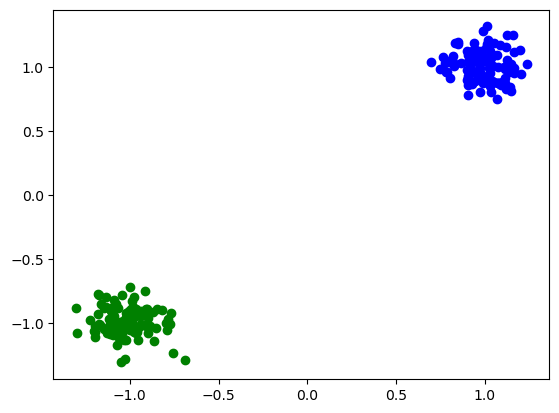

In [5]:
diag_df = diagonales(200, 2, 0.01)

# diferenciar entre clase 0 y clase 1
c0 = diag_df[diag_df['output'] == 0]
c1 = diag_df[diag_df['output'] == 1]

xs0 = [e[0] for e in c0['input']]
ys0 = [e[1] for e in c0['input']]
xs1 = [e[0] for e in c1['input']]
ys1 = [e[1] for e in c1['input']]

import itertools

colors = itertools.cycle(["g","b","a"]);
plt.scatter(xs0, ys0, color=next(colors))
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [6]:
def paralelas(n, d, C):
    mean0 = np.zeros(d)
    mean1 = np.zeros(d)
    mean0[0] = 1
    mean1[0] = -1

    desv = C 
    covarianza = np.diag(np.full(d, desv ** 2))

    input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
    input1 = np.random.multivariate_normal(mean1, covarianza, (n-n//2))

    output0 = np.full(n//2, 0)
    output1 = np.full(n-n//2, 1)

    inputs = np.concatenate([input0, input1])
    outputs = np.concatenate([output0, output1])
    
    return pd.DataFrame({"input" : inputs.tolist(), "output" : outputs})

paralelas(10, 2, 0.75)


,input,output
0,"[0.8004360625419433, 0.37756285123108435]",0
1,"[1.2442149459907936, 0.3998055163592365]",0
2,"[2.2846637869077764, -0.2149671487821459]",0
3,"[1.5660583980154197, 0.16828675793060416]",0
4,"[-0.9054527770445615, -0.7855759545552097]",0
5,"[-0.8300189854459985, -0.18711721565296494]",1
6,"[-0.843864152229953, 0.39612733886889995]",1
7,"[-1.0339116279717933, 1.2356336844299471]",1
8,"[-1.4055884027889367, 0.007699148659271618]",1
9,"[-1.5380436601810143, -1.267717331796199]",1


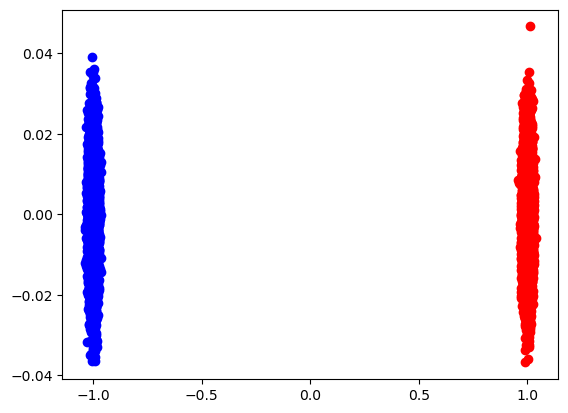

In [7]:
diag_df = paralelas(20000, 2, 0.01)

# diferenciar entre clase 0 y clase 1
c0 = diag_df[diag_df['output'] == 0]
c1 = diag_df[diag_df['output'] == 1]

xs0 = [e[0] for e in c0['input']]
ys0 = [e[1] for e in c0['input']]
xs1 = [e[0] for e in c1['input']]
ys1 = [e[1] for e in c1['input']]

import itertools

colors = itertools.cycle(["r","b","a"]);
plt.scatter(xs0, ys0, color=next(colors))
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [17]:
def checkFactor(r, theta, factor):
    x = (theta + factor*2*np.pi)
    return (r*4 - 1)*np.pi < x and x < r*4*np.pi

def generaPunto(radius=1):
    # Generar un ángulo aleatorio entre 0 y 2π
    theta = np.random.uniform(0, 2 * np.pi)
    
    # Generar un radio aleatorio con una distribución uniforme en el área del círculo
    r = radius * np.sqrt(np.random.uniform(0, 1))

    bool = True
    # Convertir coordenadas polares (r, theta) a coordenadas cartesianas (x, y)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    if checkFactor(r, theta,1) or checkFactor(r,theta,0) or checkFactor(r, theta, -1):
        return (True, np.array([x, y]))
    else:
        return (False, np.array([x,y]))

def generaInEspiral(k, bool):
    puntos = []
    contador = k
    while contador != 0:
        punto = generaPunto()
        if bool == punto[0]:
            puntos.append(punto[1])
            contador -= 1
    return np.array(puntos)

def espirales(n):
    input0 = generaInEspiral(n//2, True)
    input1 = generaInEspiral(n-n//2, False)

    output0 = np.full(n//2, 0)
    output1 = np.full(n-n//2, 1)

    inputs = np.concatenate([input0, input1])
    outputs = np.concatenate([output0, output1])
    
    return pd.DataFrame({"input" : inputs.tolist(), "output" : outputs})

espirales(50)

,input,output
0,"[-0.40262199270109766, -0.828525528153826]",0
1,"[-0.23034424454098593, -0.43319876198687085]",0
2,"[0.20726859237134587, 0.09910260468973121]",0
3,"[-0.7633084552231925, -0.5745959037292213]",0
4,"[0.6993920711169113, -0.7122398589318352]",0
5,"[-0.7207567829834237, 0.4877847659250625]",0
6,"[-0.09722854581061667, -0.5275665007337618]",0
7,"[0.13168915967789507, 0.19847055181479153]",0
8,"[-0.24075501809668498, -0.23553441873129205]",0
9,"[-0.28525577351625936, -0.46924111952666686]",0


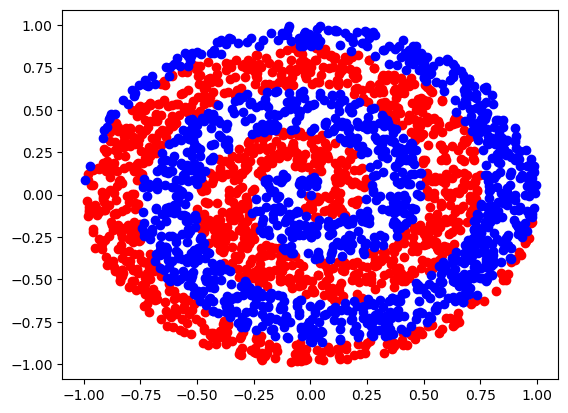

In [20]:
diag_df = espirales(2500)

# diferenciar entre clase 0 y clase 1
c0 = diag_df[diag_df['output'] == 0]
c1 = diag_df[diag_df['output'] == 1]

xs0 = [e[0] for e in c0['input']]
ys0 = [e[1] for e in c0['input']]
xs1 = [e[0] for e in c1['input']]
ys1 = [e[1] for e in c1['input']]

import itertools

colors = itertools.cycle(["r","b","a"]);
plt.scatter(xs0, ys0, color=next(colors))
plt.scatter(xs1, ys1, color='blue')
plt.show()